In [47]:
from netpyne import specs, sim
import random
from itertools import repeat
# weight params
ampaweightpr = 0.00008
ampaweight = 0.000065
ampaweightin = 0.000085
gabaweight = 0.00083
gabaweightb = gabaweight*0.35
gabaweightcrcb = 0.0083*0.25
gabaweightcb = 0.0006*1.5
gabaweightcr = 0.00087*3
autogabaweight = 0.0073*0.35
nmdaweight = ampaweight*21.5
nmdaweightin = ampaweightin*0.52
ampaweightcb = 0.000029
nmdaweightcb = ampaweightcb*0.86
ampaweightcr = 0.000046
nmdaweightcr = ampaweightcr*2.2

# number of synapses
inmaxsyn = 120          # initial stim
maxsyn = 24             # PC-PC
automaxsyn = 8          # autapses
maxsyn1 = 1             # IN-IN
maxsyn2 = 12            # PC-IN 
maxsyn3 = 15            # IN-PC soma
maxsyn4 = 15            # IN-PC dend1
maxsyn5 = 14            # PC-CB
maxsyn6 = 7             # PC-CR
maxsyn7 = 2             # CR-CB
maxsyn8 = 12            # CB-PC
maxsyn9 = 10            # CR-PC

# number of cells
pcells = 16
fscells = 2
rscells = 1
iscells = 1

netParams = specs.NetParams()  # object of class NetParams to store the network parameters
simConfig = specs.SimConfig()

netParams.popParams['PYR_pop'] = {'cellModel': 'PYR_cell', 'cellType': 'PYR',  'numCells': pcells}
netParams.popParams['FSin_pop'] = {'cellModel': 'FS_cell', 'cellType': 'FSin',  'numCells': fscells}
netParams.popParams['RSin_pop'] = {'cellModel': 'RS_cell', 'cellType': 'RSin',  'numCells': rscells}
netParams.popParams['ISin_pop'] = {'cellModel': 'IS_cell', 'cellType': 'ISin',  'numCells': iscells}

netParams.importCellParams(
        label='PYR',
        conds={'cellType': 'PYR', 'cellModel': 'PYR_cell'},
        fileName='pfc_pc_temp.hoc',
        cellName='Pcell',
        importSynMechs=True)

netParams.importCellParams(
        label='FSin',
        conds={'cellType': 'FSin', 'cellModel': 'FS_cell'},
        fileName='incell.hoc',
        cellName='INcell',
        importSynMechs=True)

netParams.importCellParams(
        label='RSin',
        conds={'cellType': 'RSin', 'cellModel': 'RS_cell'},
        fileName='cb.hoc',
        cellName='CBcell',
        importSynMechs=True)

netParams.importCellParams(
        label='ISin',
        conds={'cellType': 'ISin', 'cellModel': 'IS_cell'},
        fileName='cr.hoc',
        cellName='CRcell',
        importSynMechs=True)

print(netParams.cellParams.keys())

netParams.synMechParams['AMPA'] = {'mod': 'GLU'}
netParams.synMechParams['AMPAIN'] = {'mod': 'GLUIN'}
netParams.synMechParams['GABAA'] = {'mod': 'GABAa'}
netParams.synMechParams['GABAIN'] = {'mod': 'GABAain'}
netParams.synMechParams['NMDA'] = {'mod': 'NMDA'}
netParams.synMechParams['NMDAIN'] = {'mod': 'NMDAIN'}
netParams.synMechParams['GABAB'] = {'mod': 'GABAb'}

netParams.defaultThreshold = -20

# autapses
# ampa random seed = 3, nmda random seed = 124
netParams.connParams['autapses'] = {
        'preConds': {'pop': 'PYR_pop'},
        'postConds': {'pop': 'PYR_pop'},
        'sec': 'dend_0',
        'synMech': ['AMPA', 'NMDA'],
        'weight': list(repeat([list(repeat(ampaweight, automaxsyn)), list(repeat(nmdaweight, automaxsyn))], 16)),
        'synsPerConn': automaxsyn,
        'delay': list(repeat([list(repeat(random.gauss(0.96, 0.11), automaxsyn)), list(repeat(random.gauss(1.33, 0.13), automaxsyn))], 16)),
        'connList': [[0, 0], [1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9],
                     [10, 10], [11, 11], [12, 12], [13, 13], [14, 14], [15, 15]]
}

# PC-PC
# in net.hoc, $1 = 0
# ampa random seed = 3, nmda random seed = 124
netParams.connParams['PYR-> PYR'] = {  # S -> M
        'preConds': {'pop': 'PYR_pop'},
        'postConds': {'pop': 'PYR_pop'},
        'sec': 'dend_0',
        'synMech': ['AMPA', 'NMDA'],
        'weight': [list(repeat(ampaweight, maxsyn)), list(repeat(nmdaweight, maxsyn))],
        'synsPerConn': maxsyn,
        # 'delay': [5, 5],
        'delay': [list(repeat(random.gauss(0.96, 0.11), maxsyn)), list(repeat(random.gauss(1.33, 0.13), maxsyn))]
}

# IN-IN
# random seed = -100
netParams.connParams['FSin->FSin'] = {
        'preConds': {'pop': 'FSin_pop'},
        'postConds': {'pop': 'FSin_pop'},
        'sec': 'soma',
        'synMech': ['GABAIN'],
        'weight': list(repeat(autogabaweight, maxsyn1)),
        'synsPerConn': maxsyn1,
        # 'delay': [5],
        'delay': list(repeat(random.gauss(1.76, 0.07), maxsyn1))
}

# PC-IN
# random seed = 0
netParams.connParams['PYR->FSin'] = {
        'preConds': {'pop': 'PYR_pop'},
        'postConds': {'pop': 'FSin_pop'},
        'sec': 'dend',
        'synMech': ['AMPAIN', 'NMDAIN'],
        'weight': [list(repeat(ampaweightin, maxsyn2)), list(repeat(nmdaweightin, maxsyn2))],
        'synsPerConn': maxsyn2,
        # 'delay': [5, 5],
        'delay': [list(repeat(random.gauss(0.6, 0.2), maxsyn2)), list(repeat(random.gauss(0.6, 0.2), maxsyn2))]
}

# IN-PC soma
# random seed = 0
netParams.connParams['FSin->PYR'] = {
        'preConds': {'pop': 'FSin_pop'},
        'postConds': {'pop': 'PYR_pop'},
        'sec': 'soma',
        'synMech': ['GABAA', 'GABAB'],
        'weight': [list(repeat(gabaweight, maxsyn3)), list(repeat(gabaweightb, maxsyn3))],
        'synsPerConn': maxsyn3,
        # 'delay': [5, 5],
        'delay': [list(repeat(random.gauss(1.8, 0.8), maxsyn3)), list(repeat(random.gauss(1.8, 0.8), maxsyn3))]
}

# IN-PC dend1
# random seed = 0
netParams.connParams['FSin->PYR'] = {
        'preConds': {'pop': 'FSin_pop'},
        'postConds': {'pop': 'PYR_pop'},
        'sec': 'dend_1',
        'synMech': ['GABAA', 'GABAB'],
        'weight': [list(repeat(gabaweight, maxsyn4)), list(repeat(gabaweightb, maxsyn4))],
        'synsPerConn': maxsyn4,
        # 'delay': [5, 5],
        'delay': [list(repeat(random.gauss(1.8, 0.8), maxsyn4)), list(repeat(random.gauss(1.8, 0.8), maxsyn4))]
}

# PC-CB
# random seed = 0
netParams.connParams['PYR->RSin'] = {
        'preConds': {'pop': 'PYR_pop'},
        'postConds': {'pop': 'RSin_pop'},
        'sec': 'dend',
        'synMech': ['AMPAIN', 'NMDA'],
        'weight': [list(repeat(ampaweightcb, maxsyn5)), list(repeat(nmdaweightcb, maxsyn5))],
        'synsPerConn': maxsyn5,
        # 'delay': [5, 5],
        'delay': [list(repeat(random.gauss(0.6, 0.2), maxsyn5)), list(repeat(random.gauss(0.6, 0.2), maxsyn5))]
}

# PC-CR
# random seed = 0
netParams.connParams['PYR->ISin'] = {
        'preConds': {'pop': 'PYR_pop'},
        'postConds': {'pop': 'ISin_pop'},
        'sec': 'dend_0',
        'synMech': ['AMPAIN', 'NMDA'],
        'weight': [list(repeat(ampaweightcr, maxsyn6)), list(repeat(nmdaweightcr, maxsyn6))],
        'synsPerConn': maxsyn6,
        # 'delay': [5, 5],
        'delay': [list(repeat(random.gauss(0.6, 0.2), maxsyn6)), list(repeat(random.gauss(0.6, 0.2), maxsyn6))]
}

# CR-CB
# random seed = 0
netParams.connParams['ISin->RSin'] = {
        'preConds': {'pop': 'ISin_pop'},
        'postConds': {'pop': 'RSin_pop'},
        'sec': 'dend',
        'synMech': ['GABAA'],
        'weight': list(repeat(gabaweightcrcb, maxsyn7)),
        'synsPerConn': maxsyn7,
        # 'delay': [5],
        'delay': list(repeat(random.gauss(1.8, 0.8), maxsyn7))
}

# CB-PC
# random seed = 0
netParams.connParams['RSin->PYR'] = {
        'preConds': {'pop': 'RSin_pop'},
        'postConds': {'pop': 'PYR_pop'},
        'sec': 'dend_2',
        'synMech': ['GABAA'],
        'weight': list(repeat(gabaweightcb, maxsyn8)),
        'synsPerConn': maxsyn8,
        # 'delay': [5],
        'delay': list(repeat(random.gauss(1.8, 0.8), maxsyn8))
}

# CR-PC
# random seed = 0
netParams.connParams['ISin->PYR'] = {
        'preConds': {'pop': 'ISin_pop'},
        'postConds': {'pop': 'PYR_pop'},
        'sec': 'dend_2',
        'synMech': ['GABAA'],
        'weight': list(repeat(gabaweightcr, maxsyn9)),
        'synsPerConn': maxsyn9,
        # 'delay': [5],
        'delay': list(repeat(random.gauss(1.8, 0.8), maxsyn9))
}

odict_keys(['PYR', 'FSin', 'RSin', 'ISin'])


In [19]:
netParams.stimSourceParams['ns1'] = {
        'type': 'NetStim',
        'interval': 50, 
        'number': 10,
        'start': 0,
        'noise': 0
}

netParams.stimTargetParams['nc1'] = {
        'source': 'ns1',
        'conds': {'cellModel': 'PYR_cell'},
        'synMech': 'AMPA',
        'weight': ampaweightpr,
        'delay': 1,
        'sec': 'dend_1',
        'loc': 'uniform(0,1)'
}
netParams.stimTargetParams['nc2'] = {
        'source': 'ns1',
        'conds': {'cellModel': 'PYR_cell'},
        'synMech': 'NMDA',
        'weight': ampaweightpr*5,
        'delay': 1,
        'sec': 'dend_1',
        'loc': 'uniform(0,1)'
}

In [43]:
simConfig.duration = 1000
simConfig.dt = 0.025
simConfig.verbose = False
simConfig.recordStep = 0.1
simConfig.savePickle = False
# Recording/plotting parameters
simConfig.recordTraces = {'V_soma':{'sec': 'soma','loc': 0.5,'var': 'v'},
                          'ik_soma': {'sec': 'soma', 'loc': 0.5, 'var': 'ik'},
                          'cai_soma': {'sec': 'soma', 'loc':0.5, 'var': 'cai'}}
recordStim = True
recordCells = ['all']
simConfig.analysis['plotTraces'] = {'include': ['all']}


Start time:  2021-05-26 21:28:19.200060

Creating network of 4 cell populations on 1 hosts...
  Number of cells on node 0: 20 
  Done; cell creation time = 0.07 s.
Making connections...
  Number of connections on node 0: 371 
  Number of synaptic contacts on node 0: 14276 
  Done; cell connection time = 0.46 s.
Adding stims...
  Number of stims on node 0: 32 
  Done; cell stims creation time = 0.00 s.
Recording 80 traces of 4 types on node 0

Running simulation for 1000.0 ms...
  Done; run time = 93.28 s; real-time ratio: 0.01.

Gathering data...
  Done; gather time = 0.37 s.

Analyzing...
  Cells: 20
  Connections: 387 (19.35 per cell)
  Synaptic contacts: 14308 (715.40 per cell)
  Spikes: 81 (4.05 Hz)
  Simulated time: 1.0 s; 1 workers
  Run time: 93.28 s
  Done; saving time = 0.13 s.
Plotting recorded cell traces ... cell


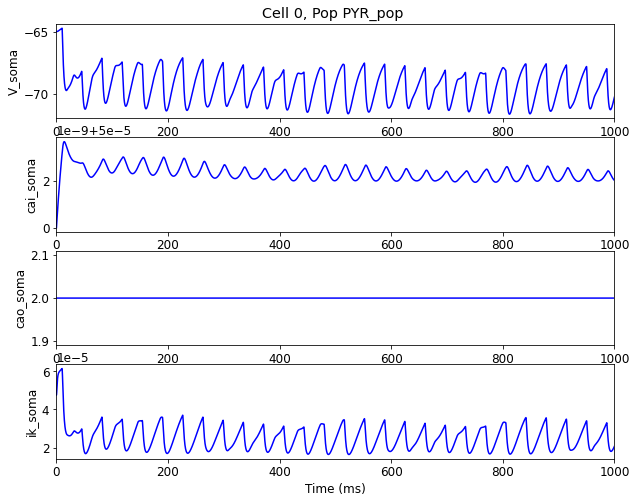

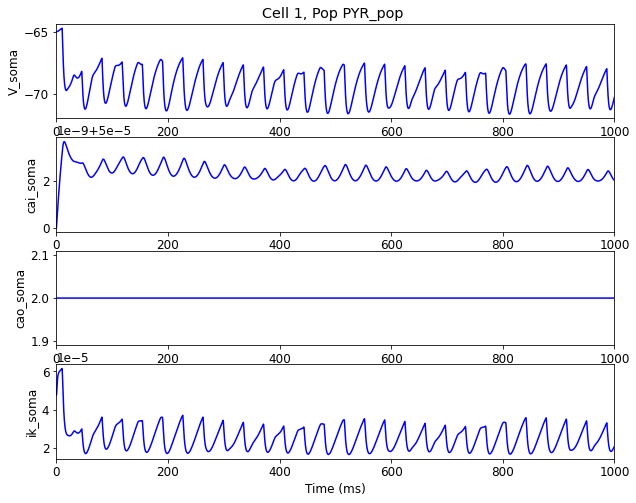

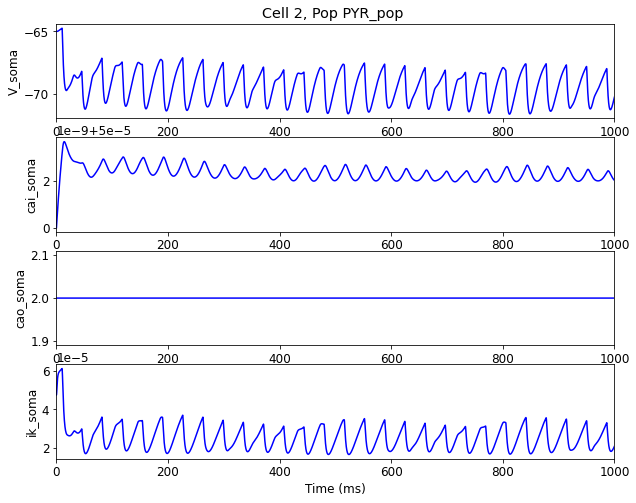

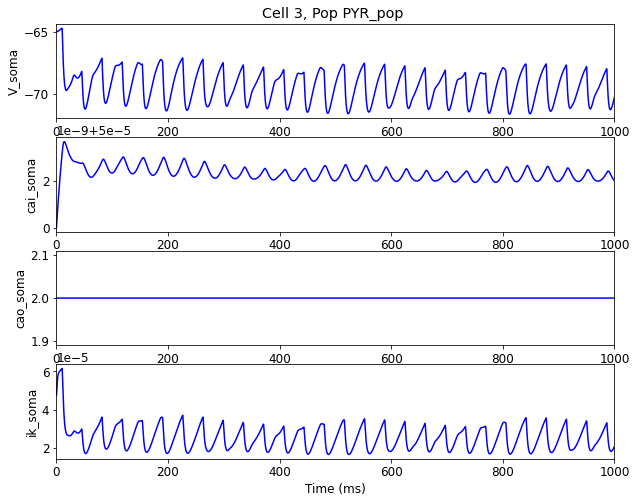

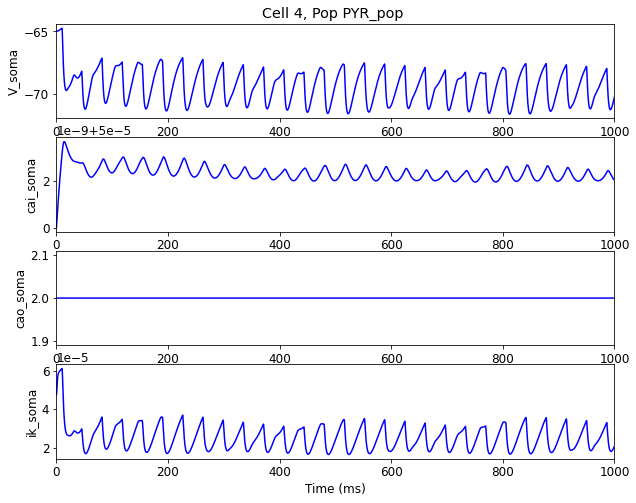

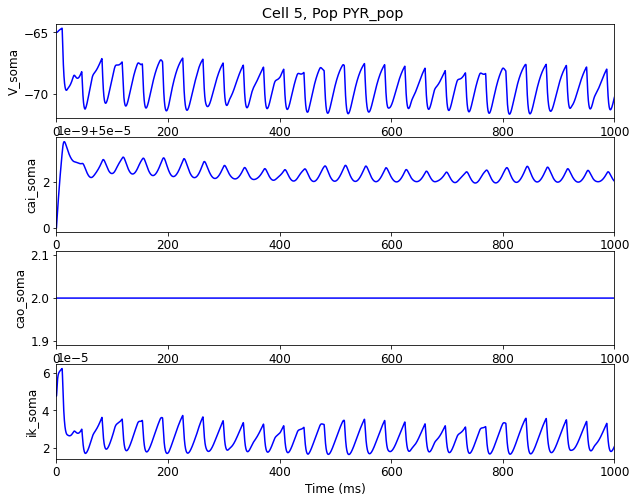

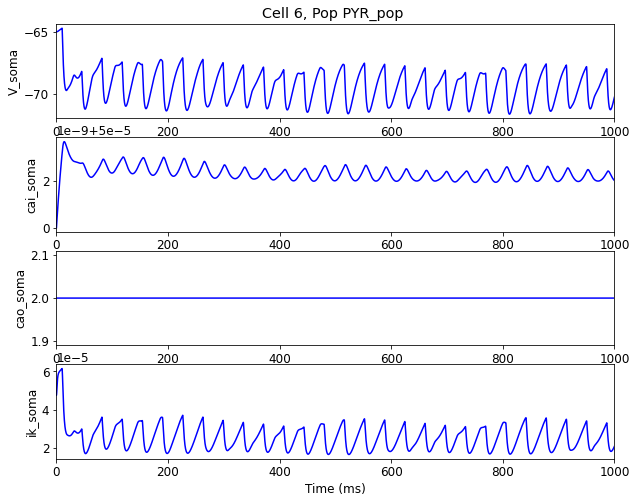

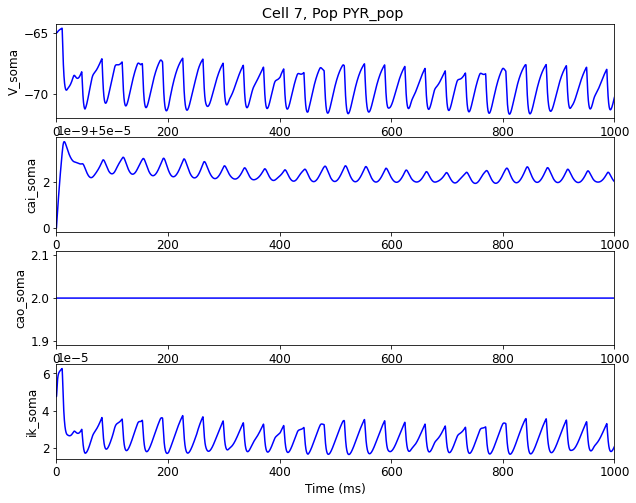

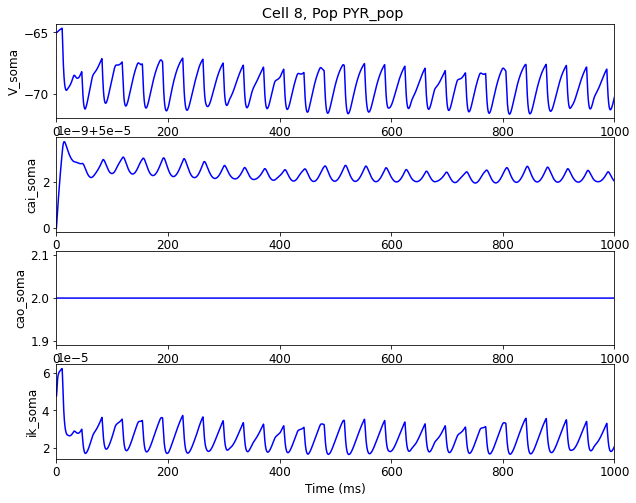

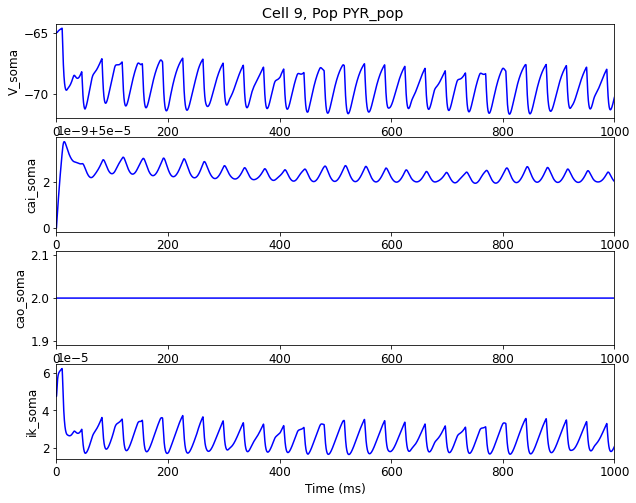

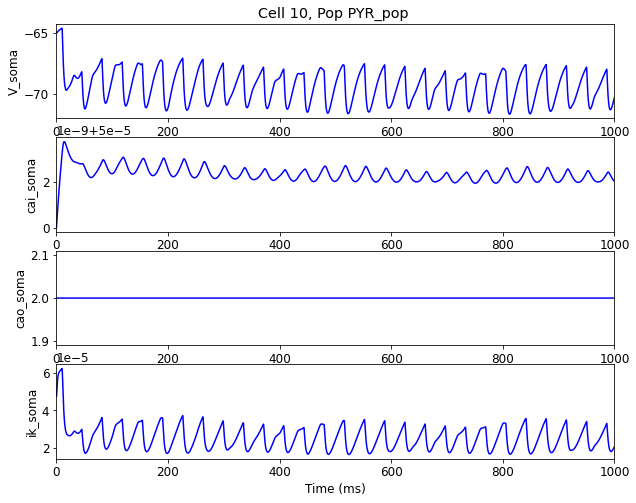

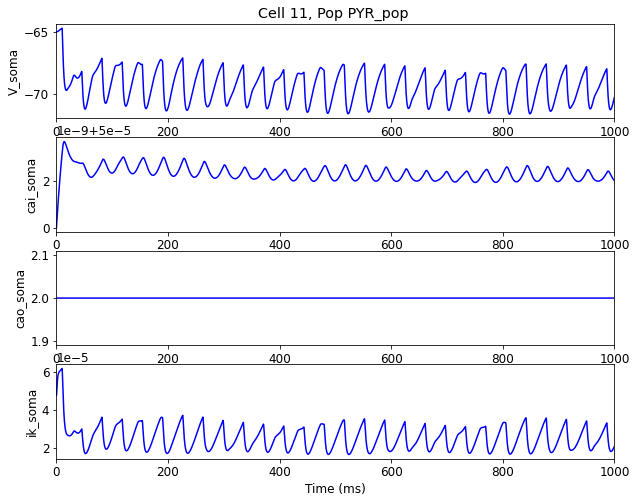

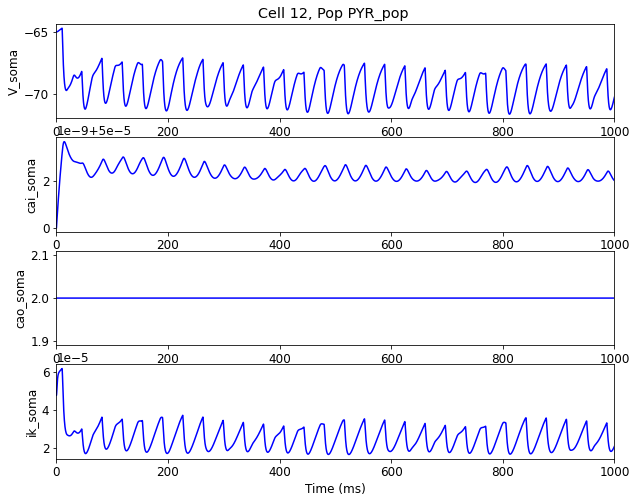

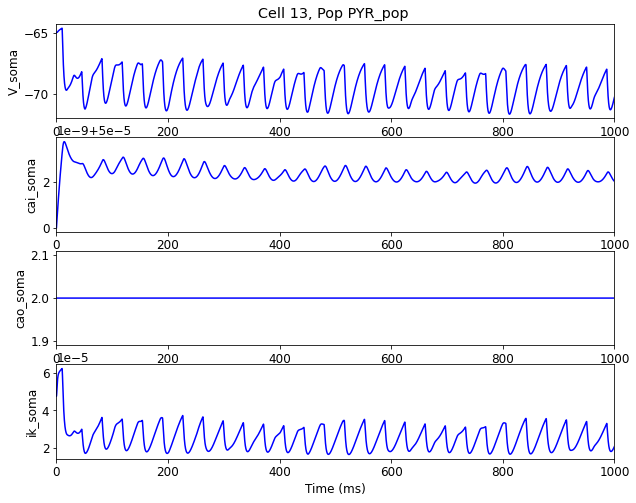

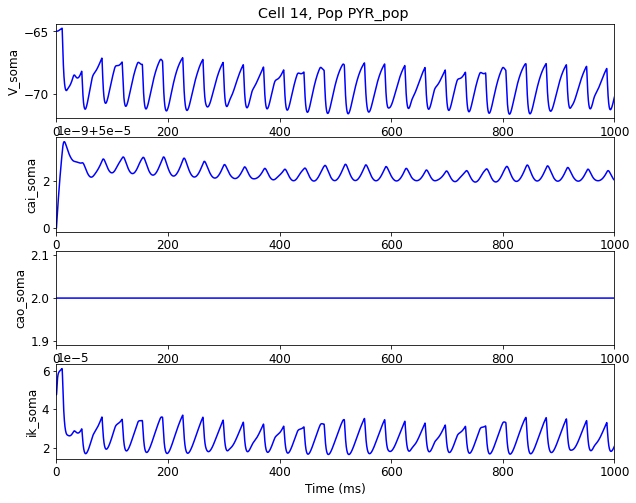

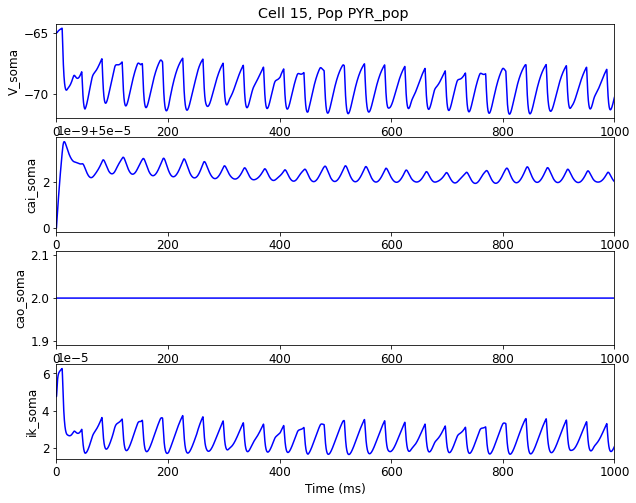

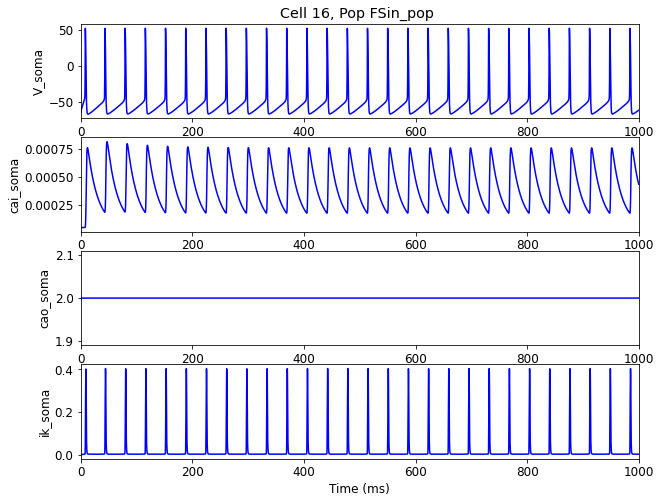

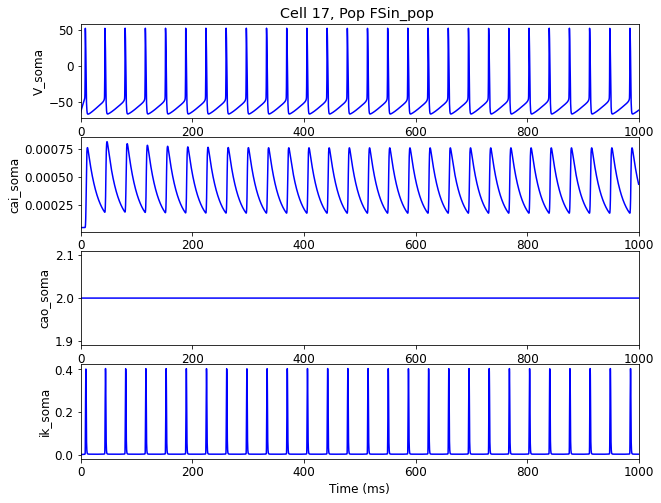

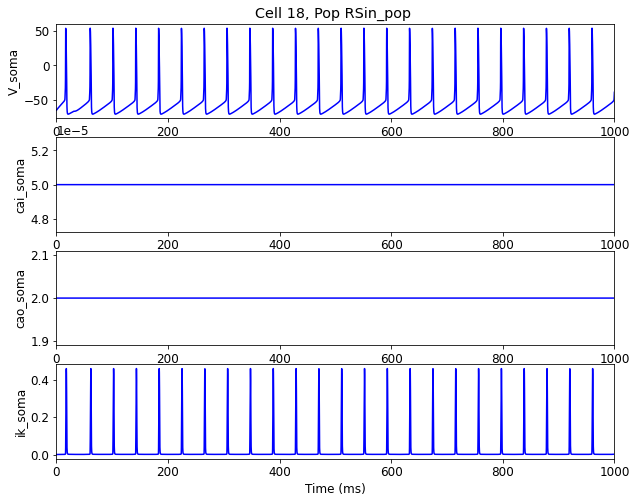

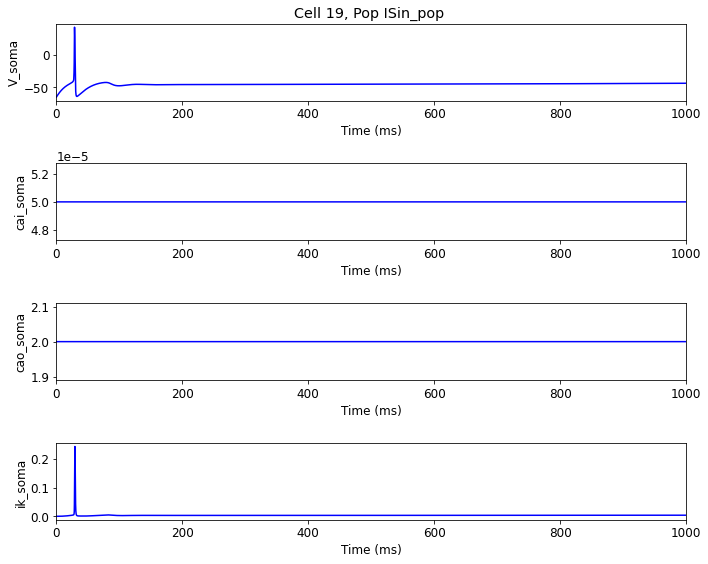

  Done; plotting time = 9.76 s

Total time = 104.16 s

End time:  2021-05-26 21:30:03.361145


In [44]:
sim.createSimulateAnalyze(netParams=netParams, simConfig=simConfig)

In [39]:
sa = sim.analysis

In [40]:
sa.plotTraces();

Plotting recorded cell traces ... cell


<Figure size 432x288 with 0 Axes>

Plotting spike histogram...


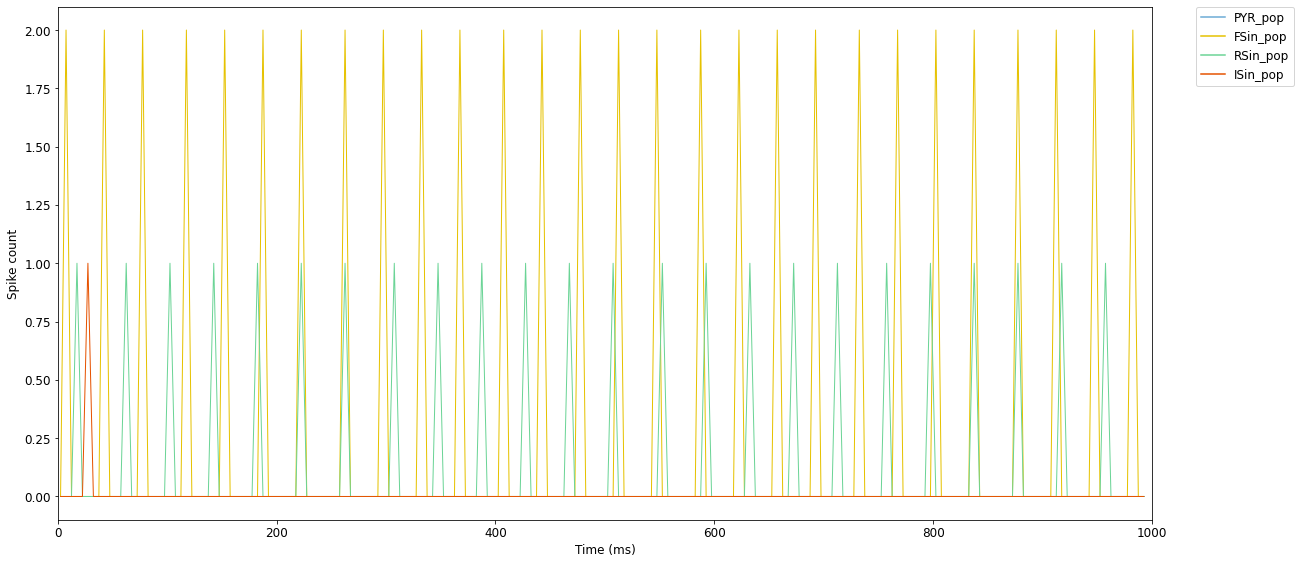

In [48]:
sa.plotSpikeHist(figSize=(20,8),binSize=5,measure='count',include=['eachPop']);

Plotting 2D representation of network cell locations and connections...


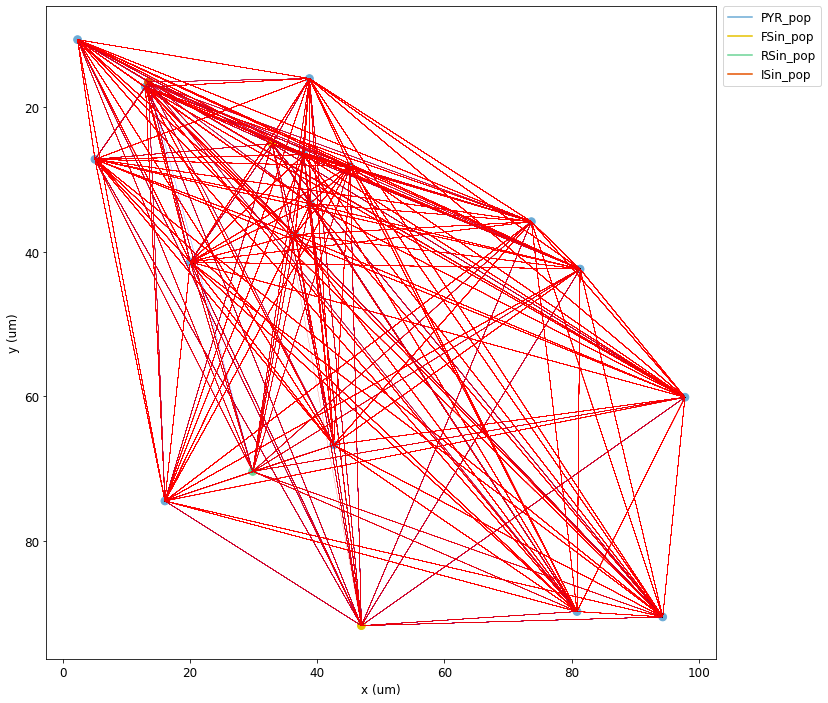

In [23]:
sa.plot2Dnet();

In [29]:
sa.plotShape(showSyns =True)

Plotting 3D cell shape ...


(<Figure size 720x576 with 1 Axes>, {})

Plotting connectivity matrix...


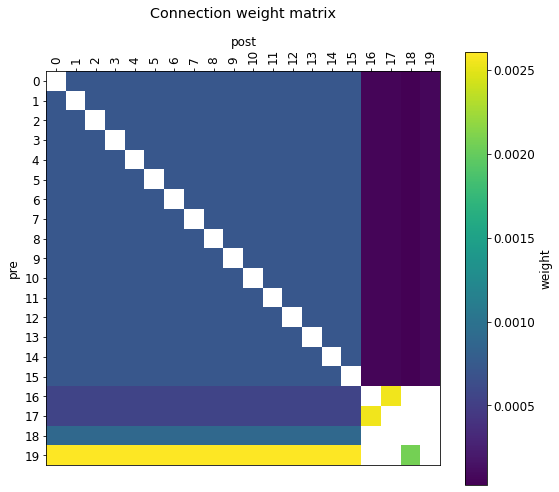

In [25]:
fig=sa.plotConn(groupBy='cell',feature='weight');

Plotting raster...


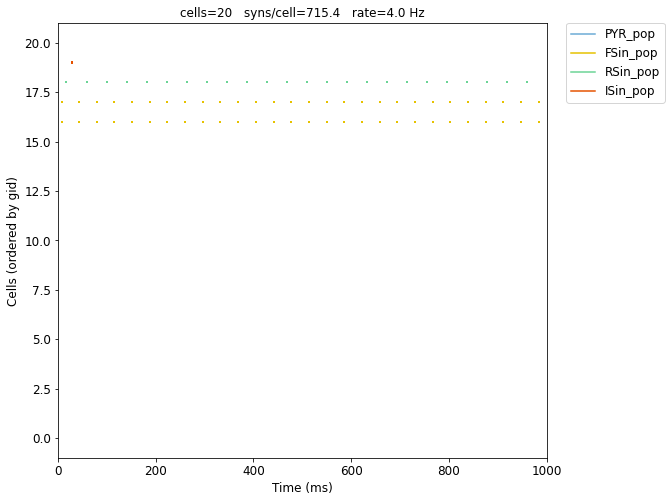

In [42]:
sa.plotRaster();